#  Analyzing and Making Predictions of Tech Stocks
In this project, I will use pandas to analyze data, including value, risk and return metrics, of the prominent 'FAANG' companies: Facebook, Apple, Amazon, Netflix, and Google. Here are some of the questions I'll address in this notebook:


What was the change in our stock’s price over time?
What was the moving average of our stocks?
What was the daily return average of a stock?
What was the correlation between daily returns of different stocks?
How much value do we put at risk by investing in a particular stock?
How can we attempt to predict future 'FAANG'-stock behavior?

In [1]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn datetime yfinance

     |████████████████████████████████| 60 kB 59 kB/s  eta 0:00:01
     |████████████████████████████████| 192 kB 23 kB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=009792a5796df2a4fbd64033feec0d0275e233503fbbbf72666e3c91900ad8da
  Stored in directory: /Users/rezaprimasatya/Library/Caches/pip/wheels/28/79/3c/08a301b673366fe664fe2853e136eb2acc1bb752045c11c6a1
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=5878d3b6da9d5196b353e6a74078b2d05b551aff565ac547c328e070cca797db
  Stored in directory: /Users/rezaprimasatya/Library/Caches/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


In [2]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
#Using yfinance to access Yahoo Historical Stocks
import yfinance as yf

I will be comparing the five "FAANG" companies to analyze their average stock prices and returns to ultimately perform a risk assessment of the stocks in the last 365 days. 

In [3]:
stock_list = ['AAPL','GOOG','MSFT','AMZN','NFLX']

end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Here I've listed simple statistics regarding the stock price of Netflix in the previous year.

In [4]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,335.283478,340.838775,330.090910,335.696797,335.696797,7.611346e+06
std,43.378939,44.489155,42.728001,43.531684,43.531684,4.427103e+06
min,255.710007,265.000000,252.279999,254.589996,254.589996,2.019300e+06
25%,298.649994,301.549988,293.279999,298.440002,298.440002,4.992600e+06
50%,335.000000,338.500000,331.019989,335.779999,335.779999,6.309400e+06
75%,365.220001,371.450012,361.170013,366.769989,366.769989,8.670400e+06
max,444.769989,449.519989,435.559998,440.519989,440.519989,3.825890e+07


In [5]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-05-13 to 2020-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


## Change in Stock Price Over Time

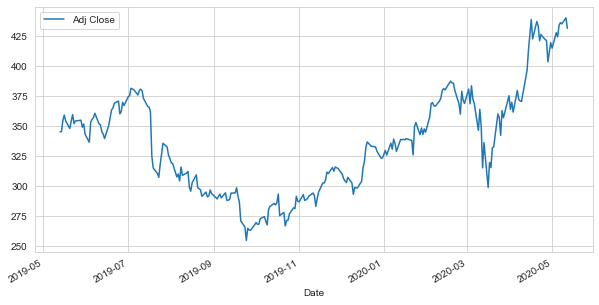

In [6]:
NFLX['Adj Close'].plot(legend = True, figsize = (10,5))

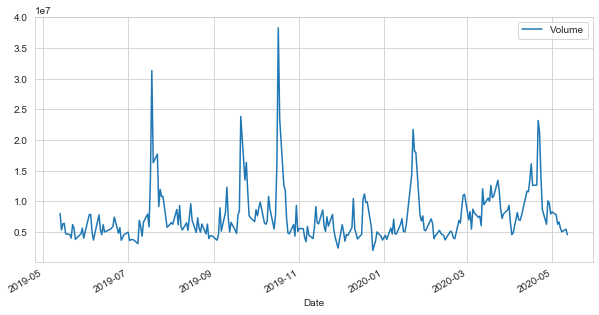

In [7]:
NFLX['Volume'].plot(legend = True, figsize = (10,5))

After a strong first quarter, Netflix stock prices have fluctuated around $375 while its volume has decreased to around 600,000 shares per day. Now let's calculate a few different moving averages to smooth out variations in our data and obtain a better trend.

## Calculating Moving Averages

In [8]:
averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    NFLX[label] = NFLX['Adj Close'].rolling(window = avg, center = False).mean()

In [9]:
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Date,,,,,,,,,
2020-05-06,429.299988,439.769989,426.390015,434.260010,434.260010,6660700,421.100000,407.715598,380.515798
2020-05-07,436.890015,438.880005,430.660004,436.529999,436.529999,5641900,422.082999,410.613599,381.661598
2020-05-08,434.140015,442.000000,433.640015,435.549988,435.549988,5054300,423.138998,413.232399,382.938398
2020-05-11,436.329987,444.890015,435.559998,440.519989,440.519989,5486000,425.052997,416.382798,384.368198
2020-05-12,442.000000,444.170013,431.359985,431.820007,431.820007,4586900,427.851999,418.457198,385.383598


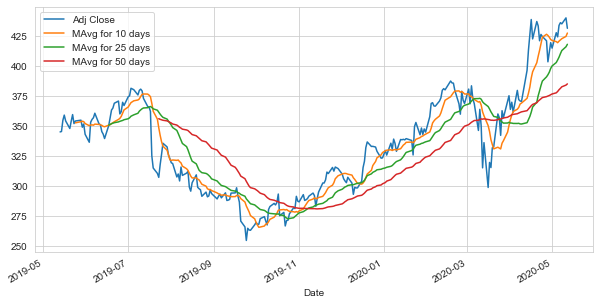

In [10]:
NFLX[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))

The 50-day moving average supports our observation that Netflix's stock has remained consistent at $365 for the past three months. This plot also reveals the approximate crossover points that tell us when Netflix's stock trend is increasing or decreasing. Now let's calculate the average daily returns for Netflix's stock.

## Daily Return Averages.


In [11]:
#The daily return column can be created by using the percentage change over the adjusted closing price
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Date,,,,,,,,,,
2020-05-06,429.299988,439.769989,426.390015,434.260010,434.260010,6660700,421.100000,407.715598,380.515798,0.022558
2020-05-07,436.890015,438.880005,430.660004,436.529999,436.529999,5641900,422.082999,410.613599,381.661598,0.005227
2020-05-08,434.140015,442.000000,433.640015,435.549988,435.549988,5054300,423.138998,413.232399,382.938398,-0.002245
2020-05-11,436.329987,444.890015,435.559998,440.519989,440.519989,5486000,425.052997,416.382798,384.368198,0.011411
2020-05-12,442.000000,444.170013,431.359985,431.820007,431.820007,4586900,427.851999,418.457198,385.383598,-0.019749


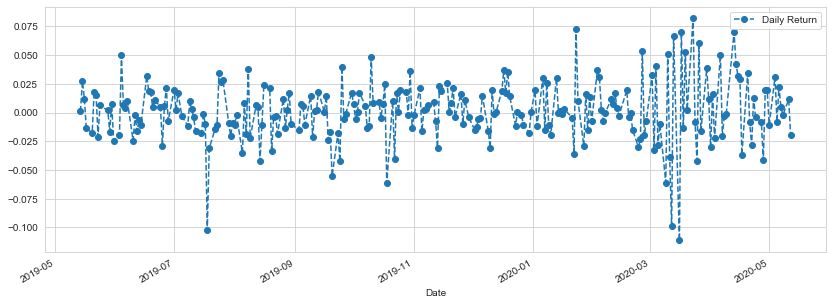

In [12]:
NFLX['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

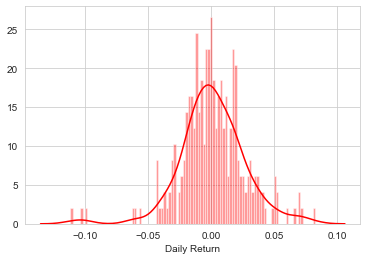

In [13]:
sns.distplot(NFLX['Daily Return'].dropna(),bins=100,color='red')

Using Seaborn to plot our axes, we find that the distribution of daily returns is concentrated heavily around 0 with little skew toward positive or negative returns.

## Correlation Between Different Daily Stock Returns

Now let's examine the trend between some pairs of the 'FAANG' stocks using Seaborn's joint plot feature, using the percent change of daily returns.

In [14]:
close_compr = yf.download(stock_list,start,end)['Adj Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2020-05-06,0.010317,0.014436,-0.002820,0.009847,0.022558
2020-05-07,0.010345,0.006954,0.018749,0.005807,0.005227
2020-05-08,0.023802,0.005068,0.011519,0.005882,-0.002245
2020-05-11,0.015735,0.012351,0.010725,0.011154,0.011411
2020-05-12,-0.011428,-0.021606,-0.019611,-0.022652,-0.019749


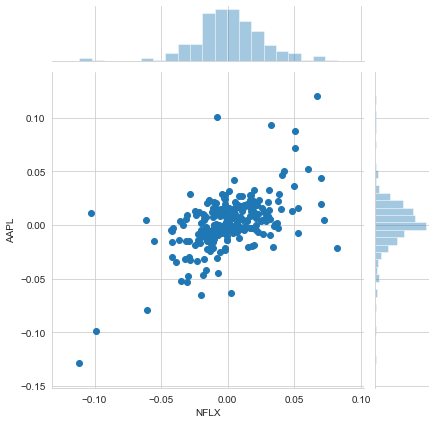

In [15]:
sns.jointplot('NFLX','AAPL',rets_compr,kind='scatter')

There seems to be a moderate correlation between Netflix and Apple returns. I'll generate all of the pairwise plots to see if there are any stronger correlations.

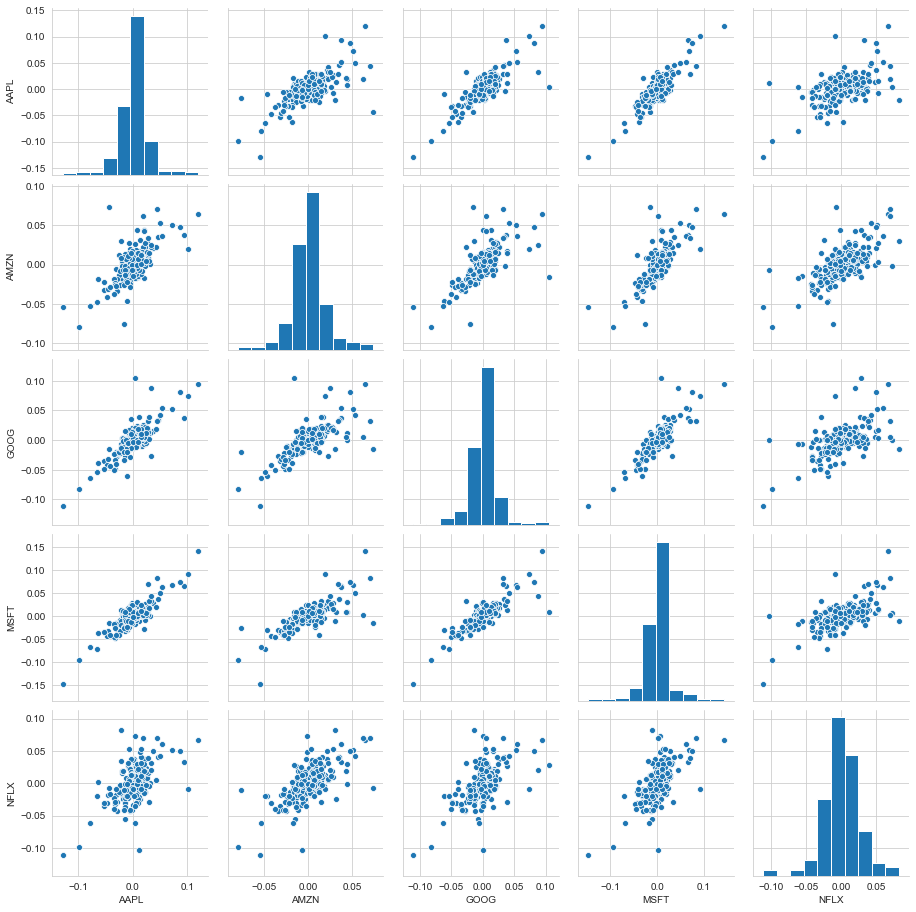

In [16]:
sns.pairplot(rets_compr.dropna())

There seems to be stronger correlations between Amazon and Microsoft, though to be sure we need another visualization tool. The correlation matrix plot, which allows us to view the pairwise confidence intervals together, is a great option for doing this.

          AAPL      AMZN      GOOG      MSFT      NFLX
AAPL  1.000000  0.678407  0.810819  0.873480  0.548741
AMZN  0.678407  1.000000  0.681894  0.753343  0.648922
GOOG  0.810819  0.681894  1.000000  0.849381  0.568309
MSFT  0.873480  0.753343  0.849381  1.000000  0.619476
NFLX  0.548741  0.648922  0.568309  0.619476  1.000000


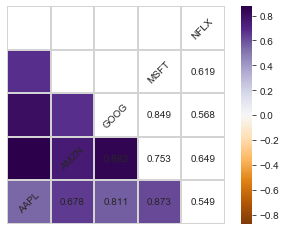

In [17]:
corr = rets_compr.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

From the correlation heatmap, it becomes clear that Microsoft and Amazon share a stronger correlation, and in general
Microsoft maintains a strongest pairwise aggregate correlations compared to the rest of the 'FAANG' companies. Though perhaps expected, it is noteworthy that all five companies pairwise have moderate to strong positive correlation.

## Determining Value from Risk vs. Expected Return
Now we address the question of risk in buying stocks to compare these five companies.

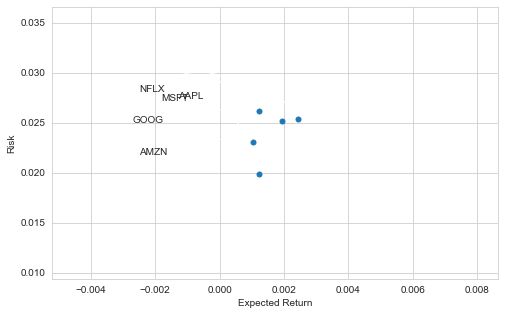

In [18]:
rets_filled = rets_compr.dropna()
plt.figure(figsize=(8,5))

plt.scatter(rets_filled.mean(),rets_filled.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets_filled.columns,rets_filled.mean(),rets_filled.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

From this plot we can see that Microsoft has the highest expected return and the lowest risk -- a sign that it is the best stock to buy at the moment. With its overhaul of its cloud computing sectors and high-profile acquisitions, Microsoft stock is a clear winner here. Netflix's performance is more concerning as it has virtually zero positive expected return along with the highest risk.

We want to model an additional value-at-risk metric in order to assess the value at each risk confidence interval for these 5 companies. Let's try this two ways: bootstrapping and using Monte Carlo-GBM, with Google.

In [19]:
rets_compr.head()

,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2019-05-13,NaN,NaN,NaN,NaN,NaN
2019-05-14,0.015830,0.009568,-0.010238,0.011188,0.001014
2019-05-15,0.011979,0.016863,0.039065,0.014082,0.027140
2019-05-16,-0.004400,0.019464,0.012687,0.023092,0.012169
2019-05-17,-0.005682,-0.020219,-0.014148,-0.006670,-0.013526


In [20]:
rets_compr['GOOG'].quantile(q=0.05)


-0.03459902274899712

In [21]:
rets_compr['GOOG'].quantile(q=0.01)



-0.0624126272351816

From the empirical quantiles given for both confience intervals, we know that the worst possible loss will not exceed 2.65 percent with 95% confidence and 5.04 percent with 99% confidence.

## Predicting Future Risk and Value of Stocks
We run the Monte Carlo Method on the GBM model to assess the stability and predict the future risk of our stocks. For this component, I'll be analyzing Google's stock.

In [22]:
days = 365

#delta t
dt = 1/365

mu = rets_compr.mean()['GOOG']

sigma = rets_compr.std()['GOOG']


def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We’re going to run 100 Monte Carlo simulations of Google stocks. Here's the stock's opening values again.



In [23]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-13,1141.959961,1147.939941,1122.109985,1132.030029,1132.030029,1860600
2019-05-14,1137.209961,1140.420044,1119.550049,1120.439941,1120.439941,1836600
2019-05-15,1117.869995,1171.329956,1116.666016,1164.209961,1164.209961,2289300
2019-05-16,1164.510010,1188.160034,1162.839966,1178.979980,1178.979980,1531400
2019-05-17,1168.469971,1180.150024,1160.010010,1162.300049,1162.300049,1208600


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

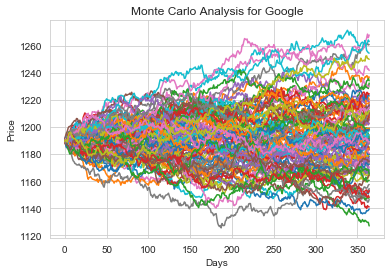

In [24]:
start_price = 1189.39 #Taken from above

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

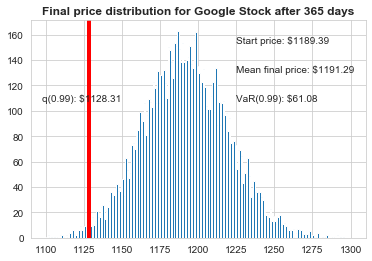

In [25]:
runs = 10000

simulations = np.zeros(runs)

for run in range(1,runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200,range = [1100,1300])

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

Based off the histogram, we conclude that Google's stock price is very stable (only a $0.11 difference between start and mean final price). The value-at-risk of our investment is $46.42 for maximum low price of $1142.97 with 99% confidence, which is approximately a 3.9% risk compared to the 6.5% we achieved via bootstrapping. 